In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs("plots/mnist", exist_ok=True)

### Load data

In [2]:
from torchvision.datasets import MNIST

train_dt = MNIST("./data", download=True, train=True)
test_dt = MNIST("./data", download=True, train=False)

In [3]:
train_dt

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train

In [4]:
images = train_dt.data.numpy()
classes = train_dt.targets.numpy()

### Analyse data structure

In [5]:
print(images.shape)
print(classes.shape)

(60000, 28, 28)
(60000,)


In [6]:
print(np.isnan(images).any())
print(np.isnan(classes).any())

False
False


In [7]:
print(np.unique(classes))

[0 1 2 3 4 5 6 7 8 9]


In [8]:
pd.DataFrame(images[0, :, :])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


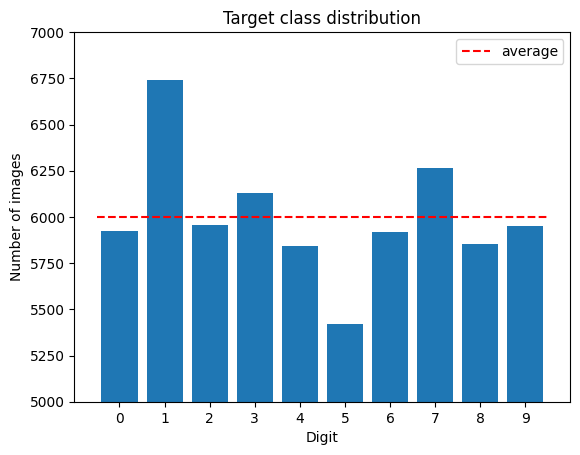

In [9]:
counts = pd.Series(classes).value_counts().sort_index()
mean = counts.mean()

plt.bar(counts.index, counts, tick_label=counts.index)
plt.plot([counts.index[0] - 0.5, counts.index[-1] + 0.5], [mean, mean], "r--", label="average")
plt.title("Target class distribution")
plt.xlabel("Digit")
plt.ylabel("Number of images")
plt.legend()
plt.ylim([5000, 7000])

os.makedirs("plots", exist_ok=True)
plt.savefig(os.path.join("plots/mnist", "target_class_distribution" + ".png"))

plt.show()

### Take a peak at the images

In [10]:
def plot_images(images, labels=None, ncols=None, cmap="gray", name=None, plot=True, mask=None):
    if ncols is None:
        ncols = int(np.ceil(np.sqrt(images.shape[0])))
    nrows = int(np.ceil(images.shape[0] / ncols))

    plt.figure(figsize=(2 * ncols, 2 * nrows))
    
    for idx, image in enumerate(images):
        if mask is not None and mask[idx]:
            continue
        plt.subplot(nrows, ncols, idx + 1)
        plt.imshow(image, cmap=cmap)

        if labels is not None:
            plt.title(labels[idx])
        plt.axis("off")

    plt.subplots_adjust(wspace=0, hspace=0.2)
    if name is not None:
        plt.savefig(os.path.join("plots/mnist", name + ".png"))
    if plot:
        plt.show()

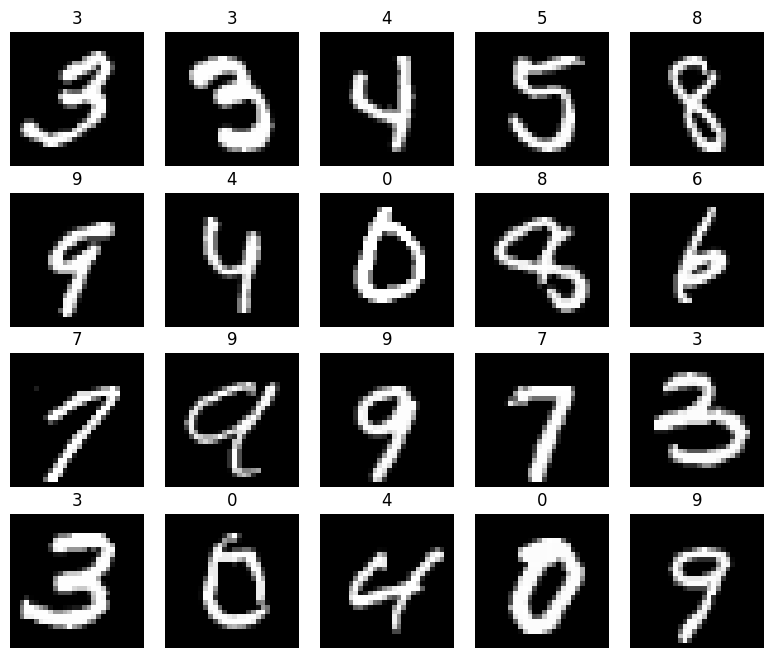

In [11]:
SAMPLE_SIZE = 20

sample_idxs = np.random.choice(images.shape[0], size=SAMPLE_SIZE, replace=False)
sample_images = images[sample_idxs, :, :]
sample_classes = classes[sample_idxs]

plot_images(sample_images, sample_classes, name="example_digits")

Images below represents random examples of images in each class

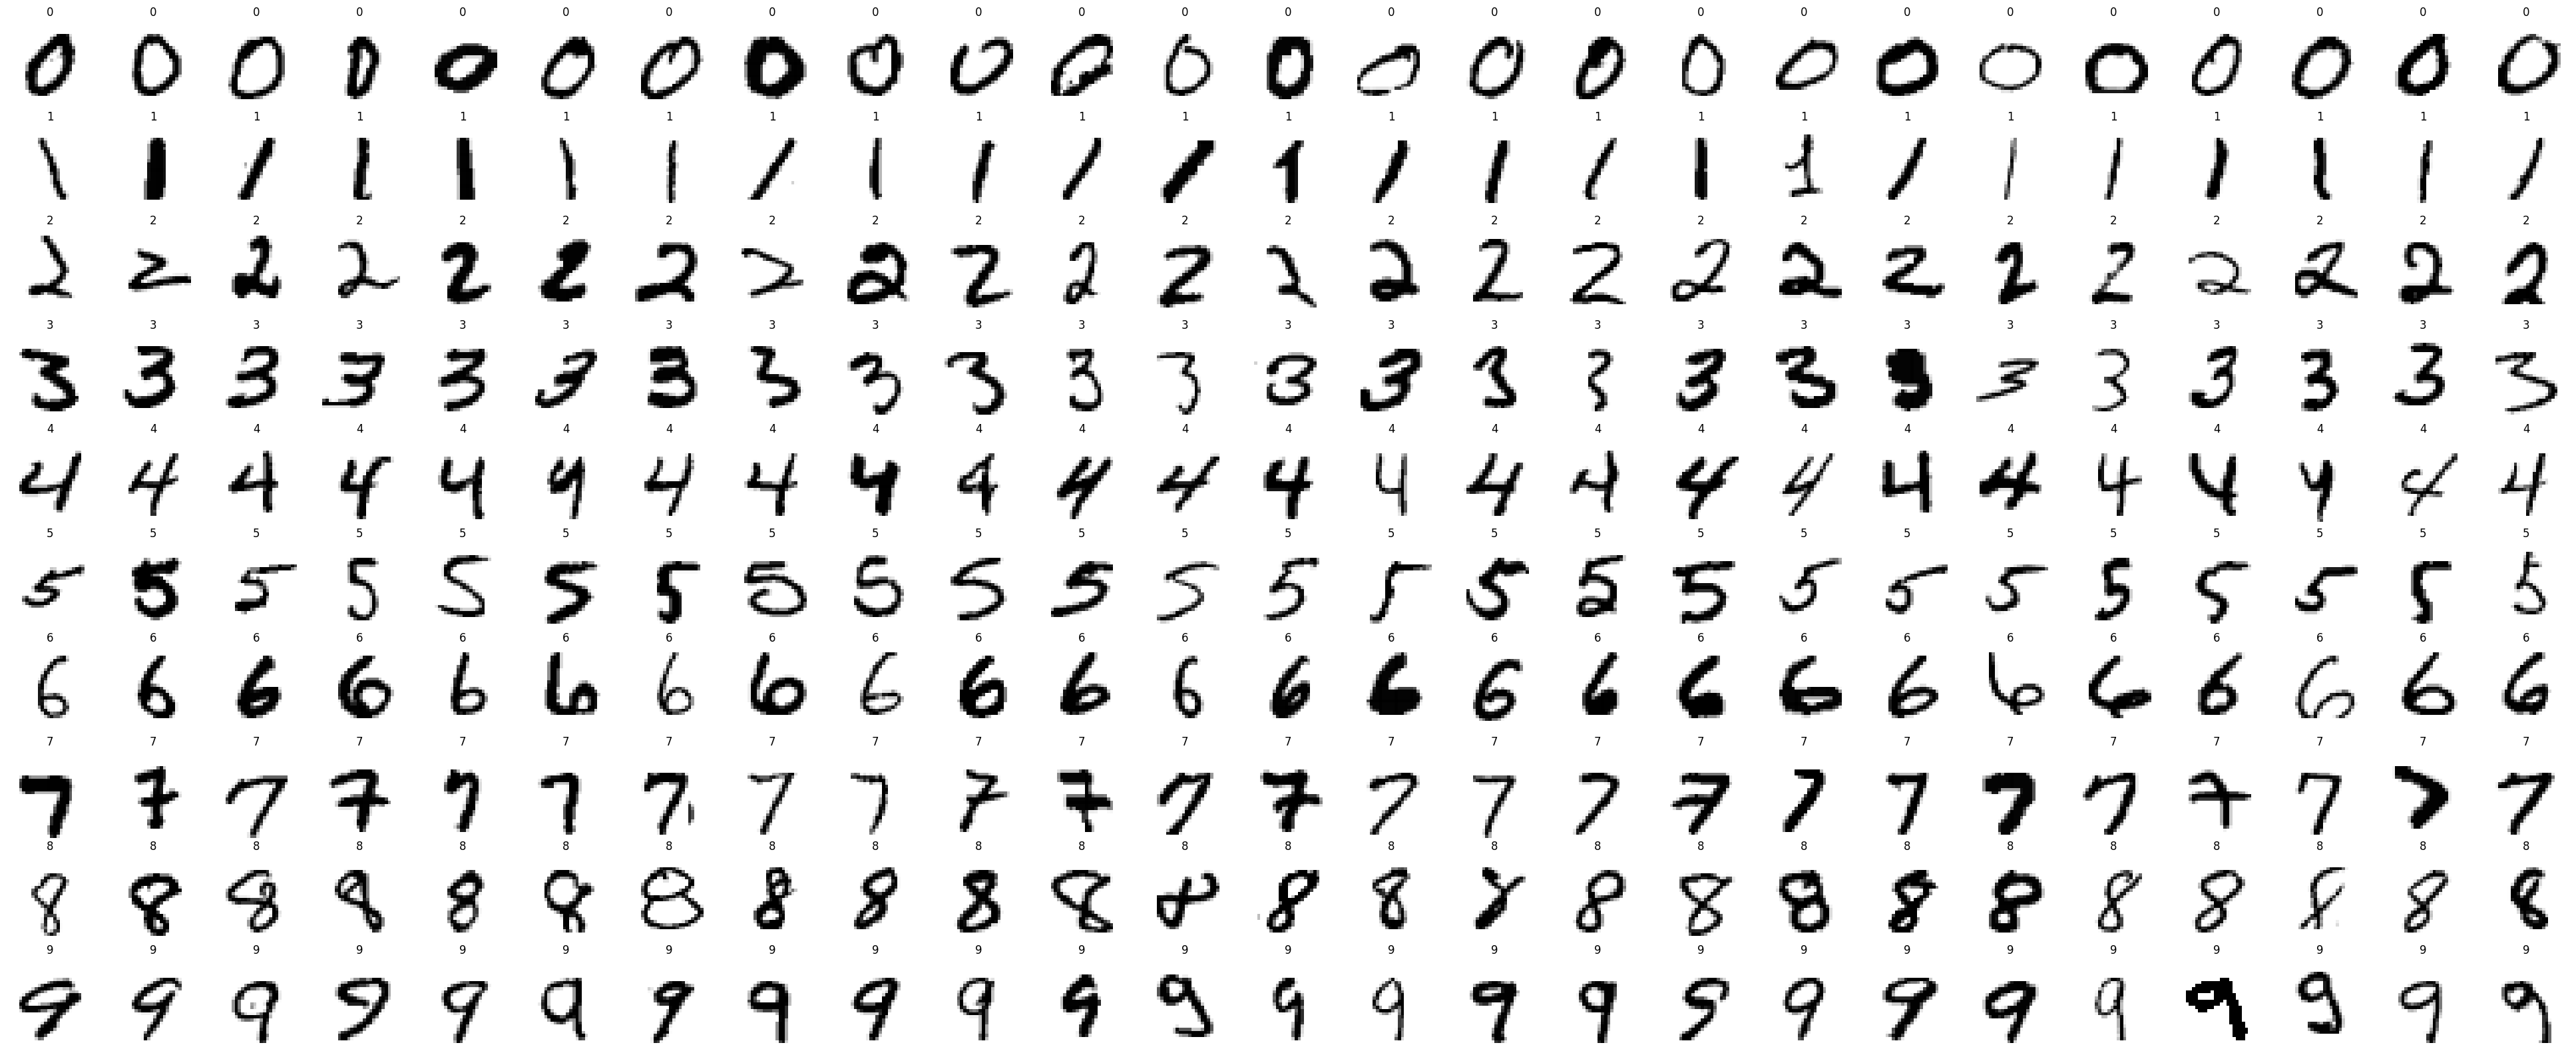

In [12]:
ROW_SAMPLES = 25

class_representants = {}
sample_idxs = np.array([], np.int64)
for class_name in np.unique(classes):
    cr = np.where(classes == class_name)[0]
    class_representants[class_name] = cr
    sample_idxs = np.r_[sample_idxs, np.random.permutation(cr)[:ROW_SAMPLES]]

sample_images = images[sample_idxs, :, :]
sample_classes = classes[sample_idxs]
plot_images(sample_images, sample_classes, ROW_SAMPLES, "binary", "classes_representants")


Image below presents how average digit for each class looks like

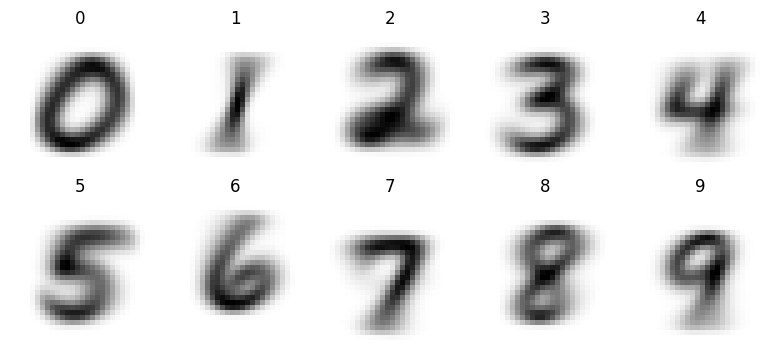

In [13]:
average = {}
for class_name, cr in class_representants.items():    
    average[class_name] = np.mean(images[cr, :, :], axis=0)

plot_images(np.array(list(average.values())), list(average.keys()), 5, "binary", "average_digits")

In [14]:
distances = np.empty(images.shape[0], np.float64)
for i in range(images.shape[0]):
    distances[i] = np.sqrt(np.mean(np.power(images[i, :, :] - average[classes[i]], 2)))

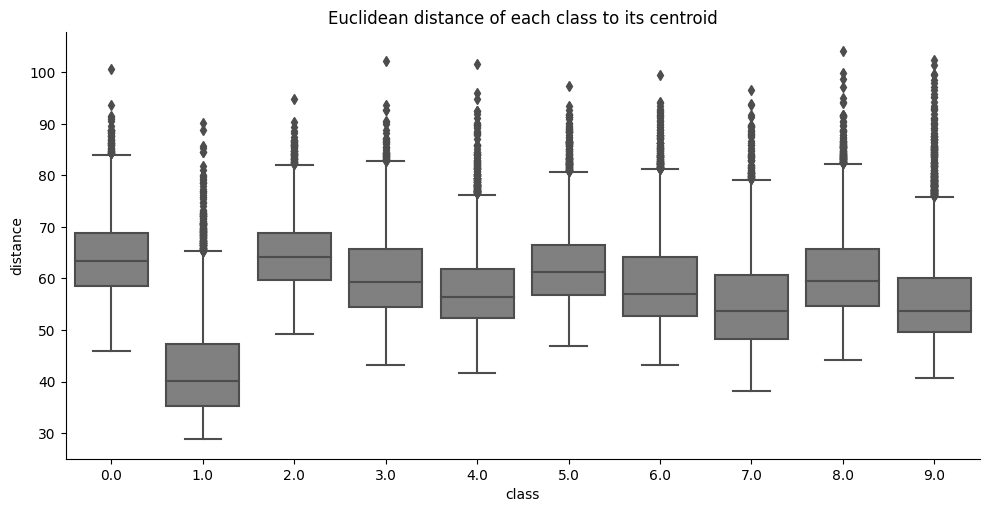

In [15]:
dt = np.c_[distances, classes]
dt = pd.DataFrame(dt, columns=["distance", "class"])

sns.catplot(dt, x="class", y="distance", kind="box", color="gray", aspect=2)
plt.title("Euclidean distance of each class to its centroid")
plt.savefig(os.path.join("plots/mnist", "euclidean_distances" + ".png"))
plt.show()

Images below represents most "badly" written digits for each class

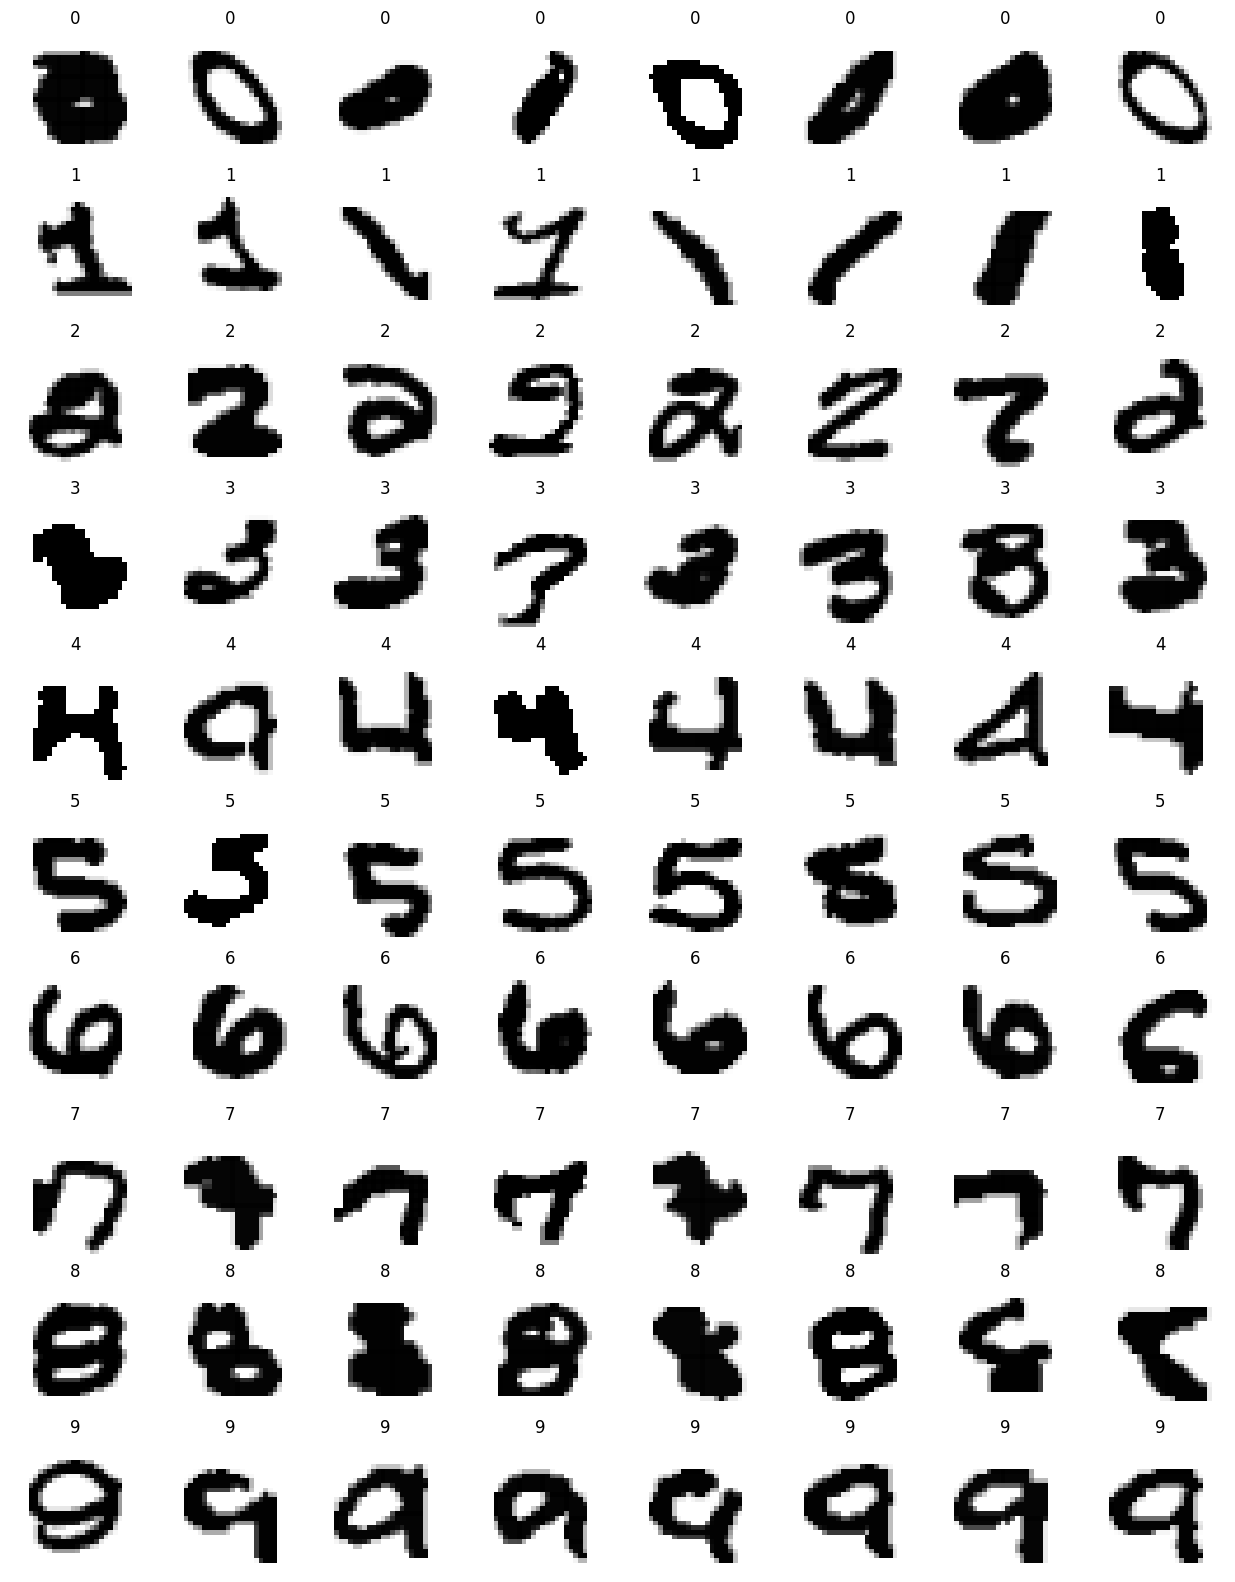

In [16]:
ROW_SAMPLES = 8

furthest_images = furthest_classes = None
for class_name, cr in class_representants.items():    
    top = np.argsort(-distances[cr])[:ROW_SAMPLES]
    if furthest_images is None:
        furthest_images = images[cr][top]
        furthest_classes = classes[cr][top]
    else:
        furthest_images = np.r_[furthest_images, images[cr][top]]
        furthest_classes = np.r_[furthest_classes, classes[cr][top]]

plot_images(furthest_images, furthest_classes, ROW_SAMPLES, "binary", "worst_images")

Image below shows difference between centroids of each class. Based on that info we can tell that distinguishing between 4 and 9 will be pretty challenging

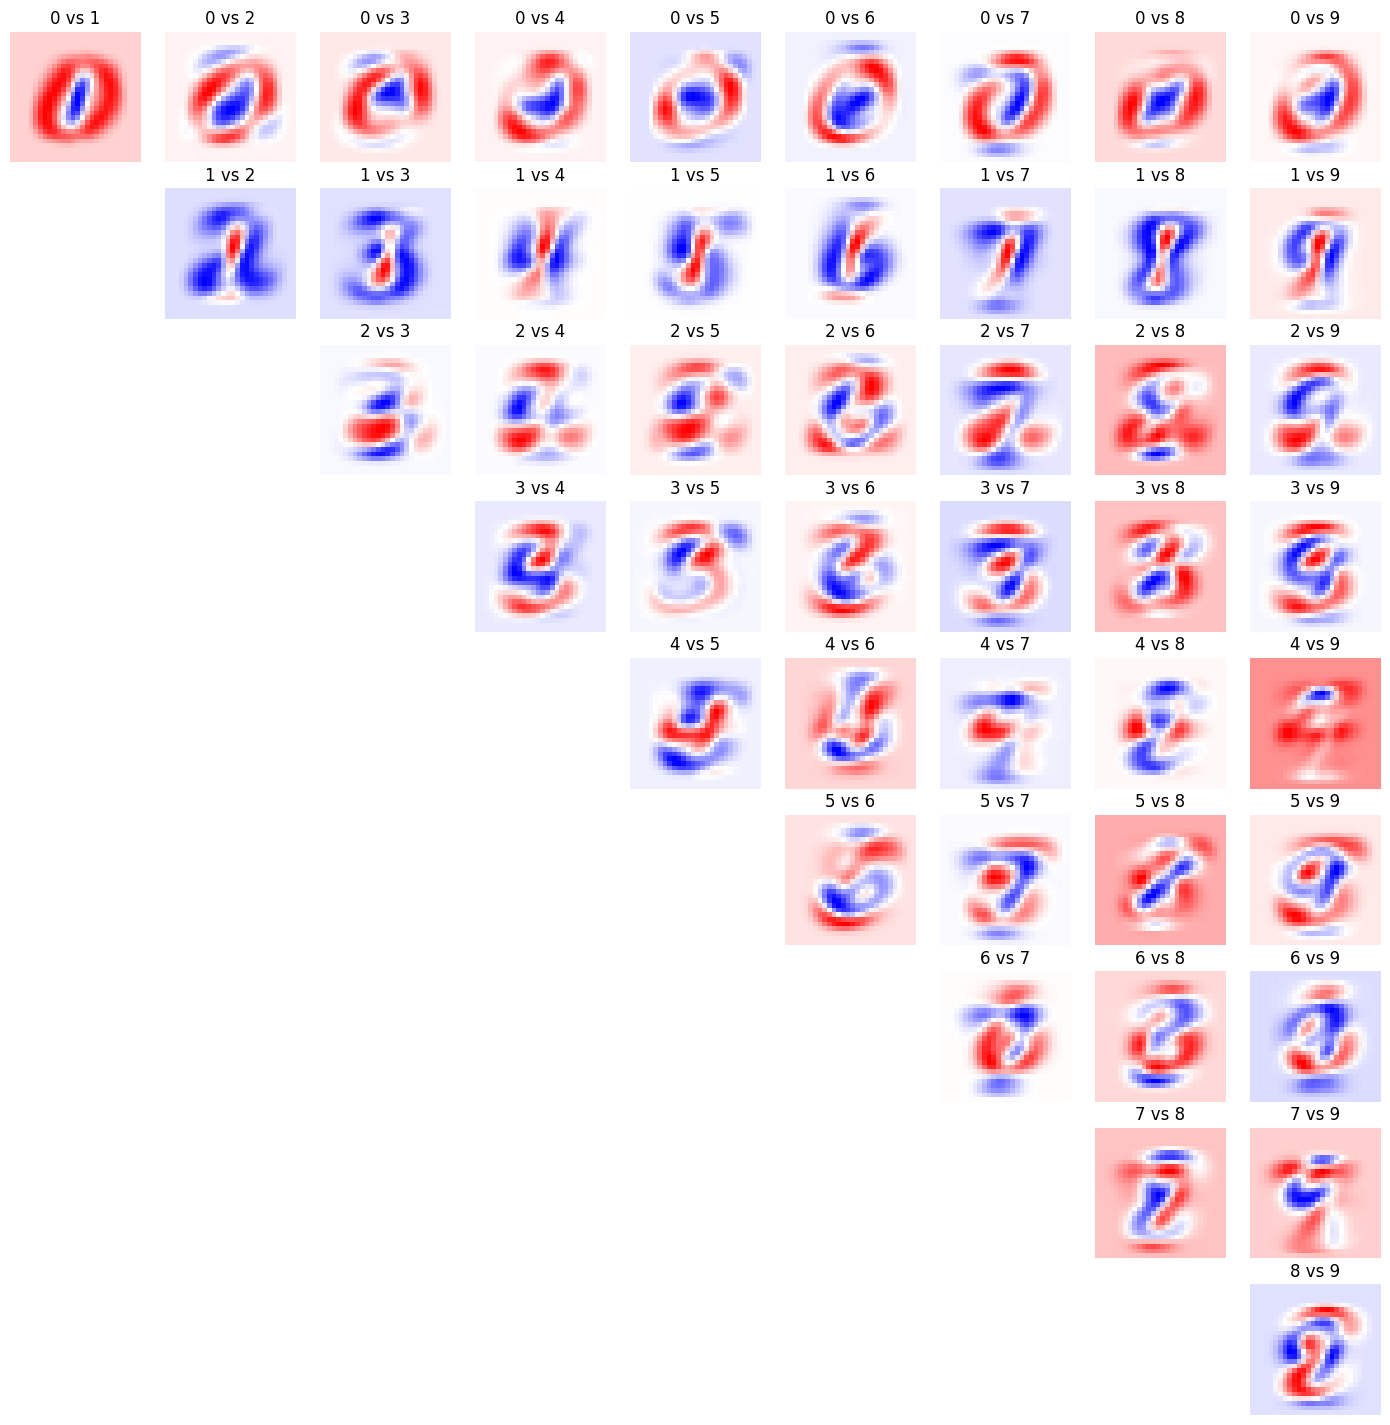

In [17]:
pairs_images = np.full((len(average) ** 2, 28, 28), 127.5, np.float64)
pairs_classes = np.empty(len(average) ** 2, "object")
mask = np.ones(len(average) ** 2, "bool")

for i, i_name in enumerate(average.keys()):
    for j, j_name in enumerate(list(average.keys())[i:]):
        if i_name != j_name:
            pairs_images[i * len(average) + j + i] = ((average[i_name] - average[j_name]) + 255.0) / 2.0
            pairs_classes[i * len(average) + j + i] = f"{i_name} vs {j_name}"
            mask[i * len(average) + j + i] = False

plot_images(pairs_images, pairs_classes, ncols=len(average), plot=False, cmap="bwr", name="centroids_differences", mask=mask)